Rizqita Mulia

# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

This Capstone Project will scrap the Ethereum's volume/date from www.coingecko.com website. Ethereum is a well-know cryptocurrency. 

This project is for educational purpose.

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [25]:
import matplotlib

In [26]:
import requests

url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel')

To visualize what exactly you get from the `request.get`, we can use .content to see what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [27]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.ico">\n<link type="application/opensearchdescription+xml" rel="search" href="/OpensearchDescription.xml" />\n<title>Ethereum USD Historical Data | CoinGecko</title>\n<meta name="description" content="Get Ethereum (ETH) USD historical prices." />\n\n<link rel="preload" href="h'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [28]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [29]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="/favicon.ico" rel="shortcut icon"/>
  <link href="/OpensearchDescription.xml" rel="search" type="application/opensearchdescription+xml">
   <title>
    Ethereum USD Historical Data | CoinGecko
   </title>
   <meta content="Get Ethereum (ETH) USD historical prices." name="description">
  


## Finding the right key to scrap the data & Extracting the right information

The information that we need are the volume rate per date.
We use the "inspect element" to find the right key code that contain "volume" and "date".

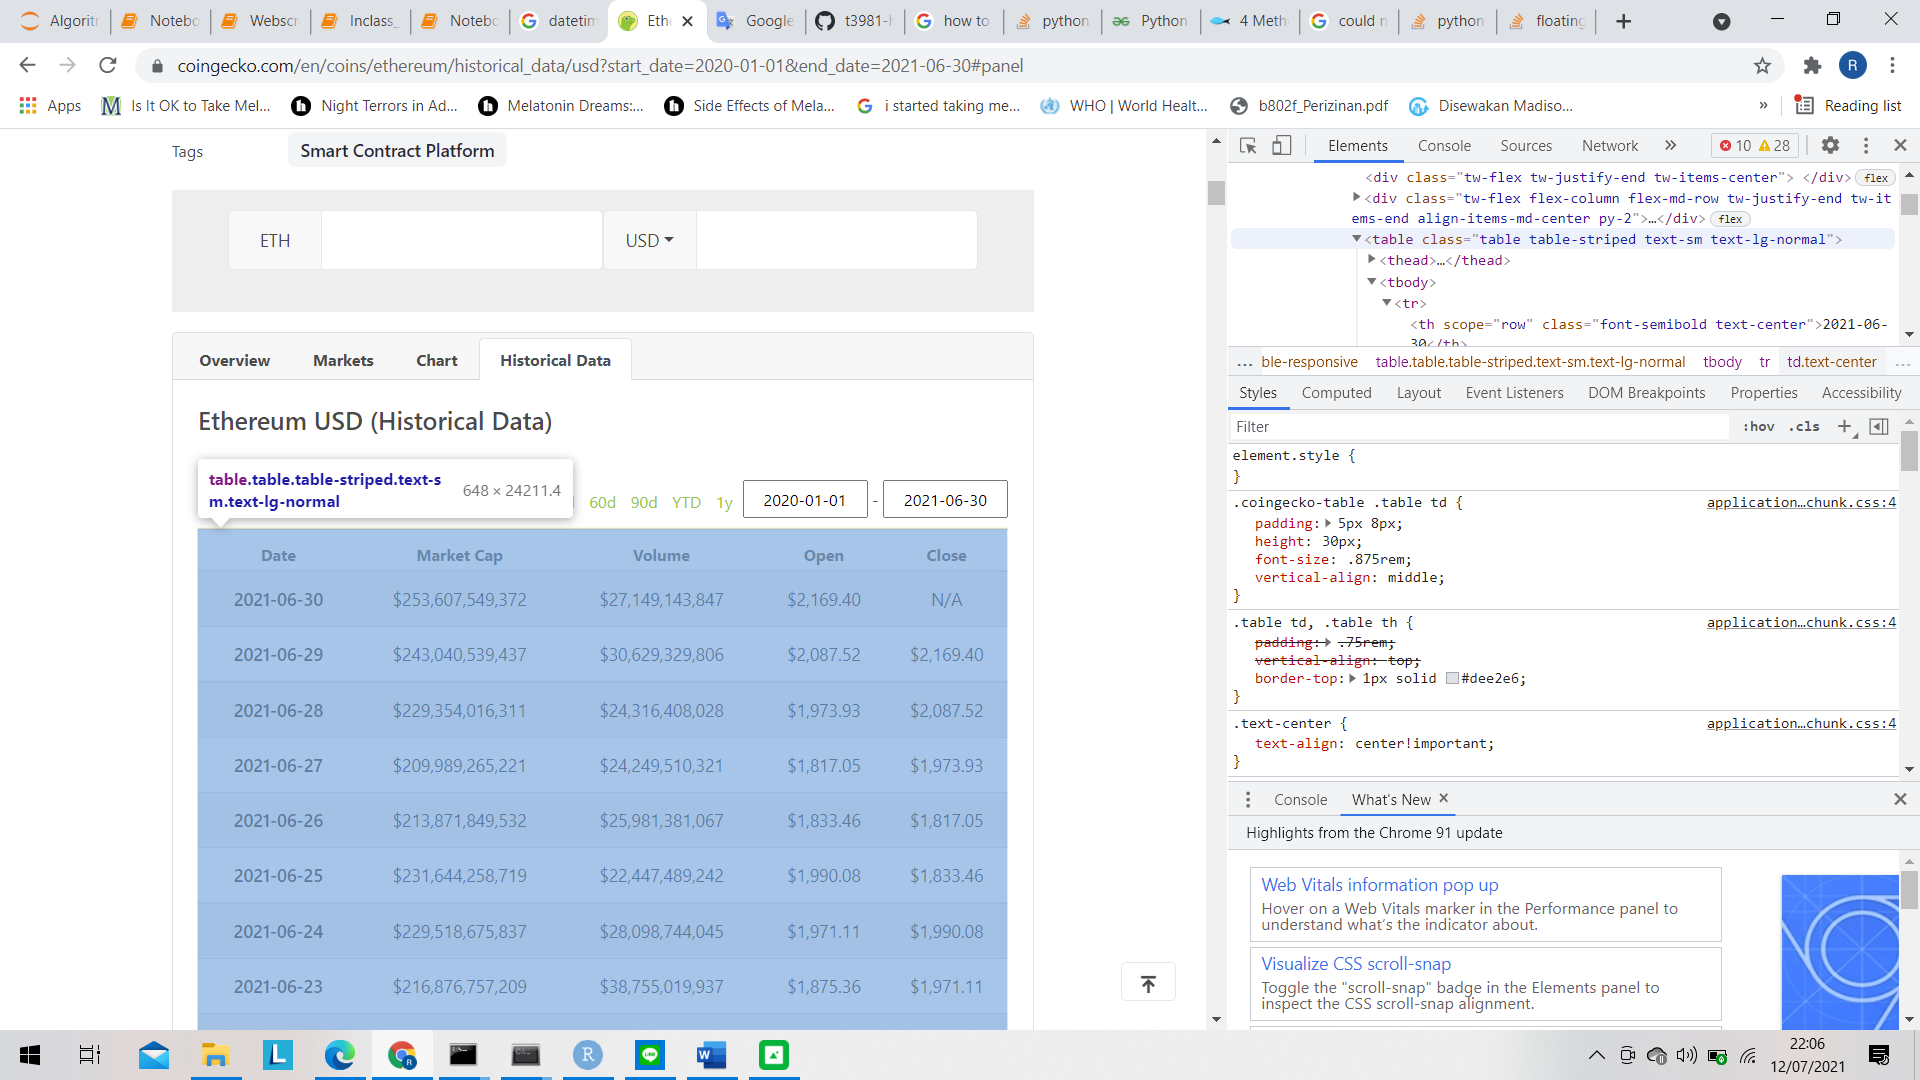

In [30]:
#In this case, the right key code is:
#<table class="table table-striped text-sm text-lg-normal">

We use the find method at our beautifusoup object. Let's also call our object to see what we get.

In [31]:
table = soup.find('table', attrs={'class':'table table-striped text-sm text-lg-normal'})
print(table.prettify()[1:500])

table class="table table-striped text-sm text-lg-normal">
 <thead>
  <tr>
   <th class="text-center">
    Date
   </th>
   <th class="text-center">
    Market Cap
   </th>
   <th class="text-center">
    Volume
   </th>
   <th class="text-center">
    Open
   </th>
   <th class="text-center">
    Close
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <th class="font-semibold text-center" scope="row">
    2021-06-30
   </th>
   <td class="text-center">
    $253,607,549,372
   </td>
   <td class="te


Use find_all to extract "Date" and "Volume" columns. The "Date" and "Volume" columns are under the "tr".

In [32]:
table = soup.find('table', attrs={'class':'table table-striped text-sm text-lg-normal'})
table.find_all('tr')[:5]

[<tr>
 <th class="text-center">Date</th>
 <th class="text-center">Market Cap</th>
 <th class="text-center">Volume</th>
 <th class="text-center">Open</th>
 <th class="text-center">Close</th>
 </tr>,
 <tr>
 <th class="font-semibold text-center" scope="row">2021-06-30</th>
 <td class="text-center">
 $253,607,549,372
 </td>
 <td class="text-center">
 $27,149,143,847
 </td>
 <td class="text-center">
 $2,169.40
 </td>
 <td class="text-center">
 N/A
 </td>
 </tr>,
 <tr>
 <th class="font-semibold text-center" scope="row">2021-06-29</th>
 <td class="text-center">
 $243,040,539,437
 </td>
 <td class="text-center">
 $30,629,329,806
 </td>
 <td class="text-center">
 $2,087.52
 </td>
 <td class="text-center">
 $2,169.40
 </td>
 </tr>,
 <tr>
 <th class="font-semibold text-center" scope="row">2021-06-28</th>
 <td class="text-center">
 $229,354,016,311
 </td>
 <td class="text-center">
 $24,316,408,028
 </td>
 <td class="text-center">
 $1,973.93
 </td>
 <td class="text-center">
 $2,087.52
 </td>
 </tr>

Finding the row length.

In [33]:
row = table.find_all('tr')
row_length = len(row)
row_length

548

Checking the row.

In [34]:
row

[<tr>
 <th class="text-center">Date</th>
 <th class="text-center">Market Cap</th>
 <th class="text-center">Volume</th>
 <th class="text-center">Open</th>
 <th class="text-center">Close</th>
 </tr>,
 <tr>
 <th class="font-semibold text-center" scope="row">2021-06-30</th>
 <td class="text-center">
 $253,607,549,372
 </td>
 <td class="text-center">
 $27,149,143,847
 </td>
 <td class="text-center">
 $2,169.40
 </td>
 <td class="text-center">
 N/A
 </td>
 </tr>,
 <tr>
 <th class="font-semibold text-center" scope="row">2021-06-29</th>
 <td class="text-center">
 $243,040,539,437
 </td>
 <td class="text-center">
 $30,629,329,806
 </td>
 <td class="text-center">
 $2,087.52
 </td>
 <td class="text-center">
 $2,169.40
 </td>
 </tr>,
 <tr>
 <th class="font-semibold text-center" scope="row">2021-06-28</th>
 <td class="text-center">
 $229,354,016,311
 </td>
 <td class="text-center">
 $24,316,408,028
 </td>
 <td class="text-center">
 $1,973.93
 </td>
 <td class="text-center">
 $2,087.52
 </td>
 </tr>

Scrapping process. Looping to get only the "Date" and "Volume" columns.

In [35]:
temp = [] #initiating a tuple

for i in range(1, row_length):
    
    #get date 
    Date = row[i].find_all('th')[0].text
    #row[i].find('th').text -> boleh pakai cara ini
    
    #get volume
    Volume = row[i].find_all('td')[1].text.strip()
    
    temp.append((Date, Volume))
    
temp

[('2021-06-30', '$27,149,143,847'),
 ('2021-06-29', '$30,629,329,806'),
 ('2021-06-28', '$24,316,408,028'),
 ('2021-06-27', '$24,249,510,321'),
 ('2021-06-26', '$25,981,381,067'),
 ('2021-06-25', '$22,447,489,242'),
 ('2021-06-24', '$28,098,744,045'),
 ('2021-06-23', '$38,755,019,937'),
 ('2021-06-22', '$39,499,960,408'),
 ('2021-06-21', '$26,235,850,447'),
 ('2021-06-20', '$20,456,963,375'),
 ('2021-06-19', '$26,204,484,921'),
 ('2021-06-18', '$25,708,624,827'),
 ('2021-06-17', '$26,150,320,395'),
 ('2021-06-16', '$26,803,957,680'),
 ('2021-06-15', '$28,128,172,338'),
 ('2021-06-14', '$29,382,118,964'),
 ('2021-06-13', '$28,235,882,062'),
 ('2021-06-12', '$26,751,786,966'),
 ('2021-06-11', '$33,075,957,437'),
 ('2021-06-10', '$43,973,432,438'),
 ('2021-06-09', '$48,344,195,674'),
 ('2021-06-08', '$37,385,872,210'),
 ('2021-06-07', '$29,050,162,249'),
 ('2021-06-06', '$34,731,979,705'),
 ('2021-06-05', '$39,996,583,175'),
 ('2021-06-04', '$38,104,663,185'),
 ('2021-06-03', '$39,148,856

## Creating data frame & Data wrangling

Put the array into dataframe

In [36]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('Date','Volume'))
df.head(n=10)

,Date,Volume
0,2021-06-30,"$27,149,143,847"
1,2021-06-29,"$30,629,329,806"
2,2021-06-28,"$24,316,408,028"
3,2021-06-27,"$24,249,510,321"
4,2021-06-26,"$25,981,381,067"
5,2021-06-25,"$22,447,489,242"
6,2021-06-24,"$28,098,744,045"
7,2021-06-23,"$38,755,019,937"
8,2021-06-22,"$39,499,960,408"
9,2021-06-21,"$26,235,850,447"


In [37]:
df.dtypes

Date      object
Volume    object
dtype: object

Do the data cleaning.

Changing the "Date" from "object" to "datetime64"

In [38]:
df['Date'] = pd.to_datetime(df['Date'])

Remove the "$" from the "Volume" value

In [39]:
df['Volume'] = df['Volume'].str.replace("$","")
df

C:\Users\KIKI\AppData\Local\Temp/ipykernel_15448/4129059049.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Volume'] = df['Volume'].str.replace("$","")


,Date,Volume
0,2021-06-30,"27,149,143,847"
1,2021-06-29,"30,629,329,806"
2,2021-06-28,"24,316,408,028"
3,2021-06-27,"24,249,510,321"
4,2021-06-26,"25,981,381,067"
...,...,...
542,2020-01-05,"6,958,393,690"
543,2020-01-04,"9,655,245,100"
544,2020-01-03,"6,497,297,884"
545,2020-01-02,"6,623,732,041"


Removing "," so it can be converted to "int64"

In [40]:
df['Volume'] = df['Volume'].str.replace(",","")
df

,Date,Volume
0,2021-06-30,27149143847
1,2021-06-29,30629329806
2,2021-06-28,24316408028
3,2021-06-27,24249510321
4,2021-06-26,25981381067
...,...,...
542,2020-01-05,6958393690
543,2020-01-04,9655245100
544,2020-01-03,6497297884
545,2020-01-02,6623732041


Convert Volume's data type to int64

In [41]:
import numpy as np
df['Volume'] = df['Volume'].astype(np.int64)
df

,Date,Volume
0,2021-06-30,27149143847
1,2021-06-29,30629329806
2,2021-06-28,24316408028
3,2021-06-27,24249510321
4,2021-06-26,25981381067
...,...,...
542,2020-01-05,6958393690
543,2020-01-04,9655245100
544,2020-01-03,6497297884
545,2020-01-02,6623732041


Checking data types

In [42]:
df.dtypes

Date      datetime64[ns]
Volume             int64
dtype: object

Because the number is to high, the .plot() function would not working. So, we divided the volume to /1000000000 to round it up.

In [43]:
df['Volume_New'] = df.Volume /1000000000
df

,Date,Volume,Volume_New
0,2021-06-30,27149143847,27.149144
1,2021-06-29,30629329806,30.629330
2,2021-06-28,24316408028,24.316408
3,2021-06-27,24249510321,24.249510
4,2021-06-26,25981381067,25.981381
...,...,...,...
542,2020-01-05,6958393690,6.958394
543,2020-01-04,9655245100,9.655245
544,2020-01-03,6497297884,6.497298
545,2020-01-02,6623732041,6.623732


Count the number of missing value using ".isna().sum()"

In [44]:
df.isna().sum()

Date          0
Volume        0
Volume_New    0
dtype: int64

Treat datetime dtypes as numeric using "datetime_is_numeric=True"

In [45]:
df.describe(include='all',datetime_is_numeric=True)

,Date,Volume,Volume_New
count,547,5.470000e+02,547.000000
mean,2020-09-30 00:00:00,2.244515e+10,22.445152
min,2020-01-01 00:00:00,4.344880e+09,4.344880
25%,2020-05-16 12:00:00,1.040704e+10,10.407036
50%,2020-09-30 00:00:00,1.503386e+10,15.033855
75%,2021-02-13 12:00:00,3.094427e+10,30.944267
max,2021-06-30 00:00:00,1.409065e+11,140.906534
std,NaN,1.812490e+10,18.124899


Return boolean value of "Date"

In [46]:
df['Date'].is_unique

True

Checking the data frame.

In [47]:
df

,Date,Volume,Volume_New
0,2021-06-30,27149143847,27.149144
1,2021-06-29,30629329806,30.629330
2,2021-06-28,24316408028,24.316408
3,2021-06-27,24249510321,24.249510
4,2021-06-26,25981381067,25.981381
...,...,...,...
542,2020-01-05,6958393690,6.958394
543,2020-01-04,9655245100,9.655245
544,2020-01-03,6497297884,6.497298
545,2020-01-02,6623732041,6.623732


Data visualisation. Simple graphical visualization using .plot(). I used "alpha" to change the transparency of the line, for beautiful purpose, but this is a personal preference.

<AxesSubplot:xlabel='Date'>

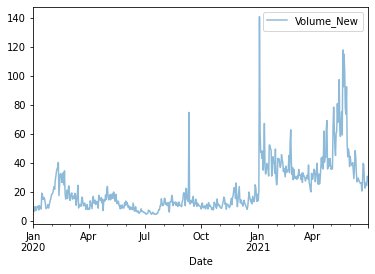

In [48]:
df.plot(x="Date", y="Volume_New", alpha=0.5)

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

#### From the result of the graphic, I conclude that Ethereum price is growing up although relatively unstable. 

The process making this notebook must be done step by step and with high thoroughness. The method I used to solve the problems in this project might not be the best as I believe there is many ways to solve the problems in this project.

### Extra Challenge

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.